#AG2 - Actividad Guiada 2
Nombre: Pilar Ruete <br>
[Abrir este notebook en Google Colab](https://colab.research.google.com/drive/1zuHsg9EhyprMV4zesl_LwU0GMjMWWyms)<br>
Github: https://github.com/ilarue/AlgoritmosOptimizacion
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

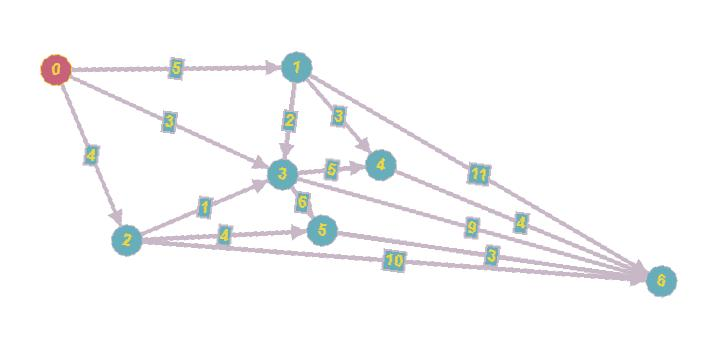

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

Estudio de Tarifas:
* Primera fila: Del nodo 0 a los demás: [0,5,4,3,float("inf"),999,999 ]
  * De 0 a 0: 0
  * De 0 a 1: 5
  * De 0 a 2: 4
  * De 0 a 3: 3
  * De 0 a 4: float("inf") (idem que 999) porque no hay camino directo
  * De 0 a 5: no hay camino directo 999
  * De 0 a 6: no hay camino directo 999
* Segunda fila: Del nodo 1 [999,0,999,2,3,999,11]
  * De 1 a 0: no hay camino directo 999
  * De 1 a 1: 0
  * De 1 a 2: no hay camino directo 999
  * De 1 a 3: 2
  * De 1 a 4: 3
  * De 1 a 5: no hay camino directo 999
  * De 1 a 6: 11
  



In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0]) # hay 7 nodos (con el 0), el número de columnas que sería lo mismo que calcular el len de la primera columna o bien de la primera fila

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n   # Creamos la matriz PRECIOS con todos a 9999, del mismo tamaño que TARIFAS
  RUTA = [ [""]*N for i in [""]*N]  # Creamos la matriz RUTA con todos a "", del mismo tamaño que TARIFAS

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

Qué calculan las matrices

* PRECIOS[i][j] Coste mínimo para ir de i a j
* RUTA[i][j] Último embarcadero intermedio óptimo antes de llegar a j

Recurrencia usada

Para cada par (i,j):

PRECIOS[i][j]=min(TARIFAS[i][j],
k=i..j−1
min
(PRECIOS[i][k]+TARIFAS[k][j]))
Esto es programación dinámica clásica
Complejidad:

O(n³)

O(n²)

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Ramificación y Poda - Problema de Asignacion de tarea

Esto NO es programación dinámica, es búsqueda con poda

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

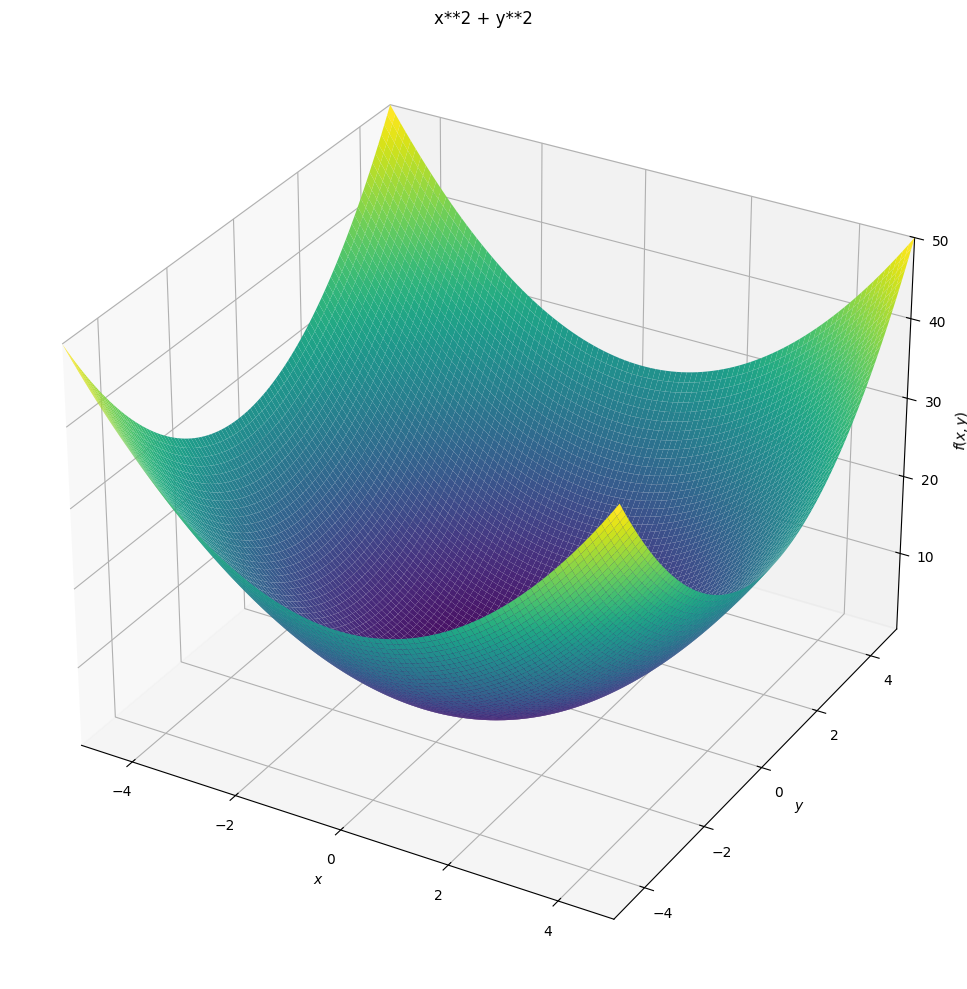

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

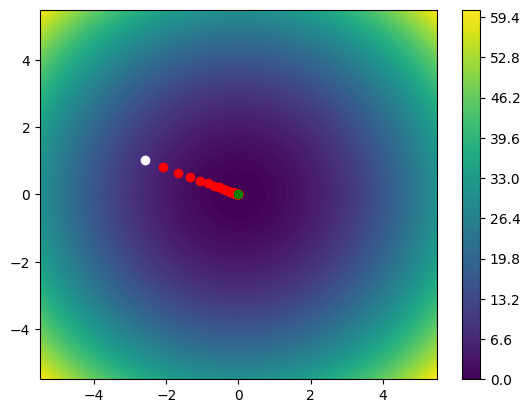

Solucion: [-3.711660602577693e-05, 1.4492846471949344e-05] 1.587685041732235e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
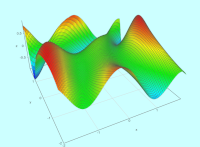


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


Características de la función:
* No convexa
* Altamente oscilatoria
* Muchos máximos y mínimos locales
* Gradiente complicado

NO es buena para gradiente clásico directo

Problema del gradiente puro:
* Se queda en mínimos locales
* Sensible al punto inicial
* El paisaje es muy irregular

Al tratarse de una función no convexa y altamente oscilatoria, el uso exclusivo de métodos basados en gradiente puede llevar a óptimos locales. Es preferible emplear una estrategia híbrida, combinando métodos de búsqueda global estocásticos para localizar regiones prometedoras del espacio, seguidos de métodos locales de optimización para refinar la solución.

Paisaje del problema

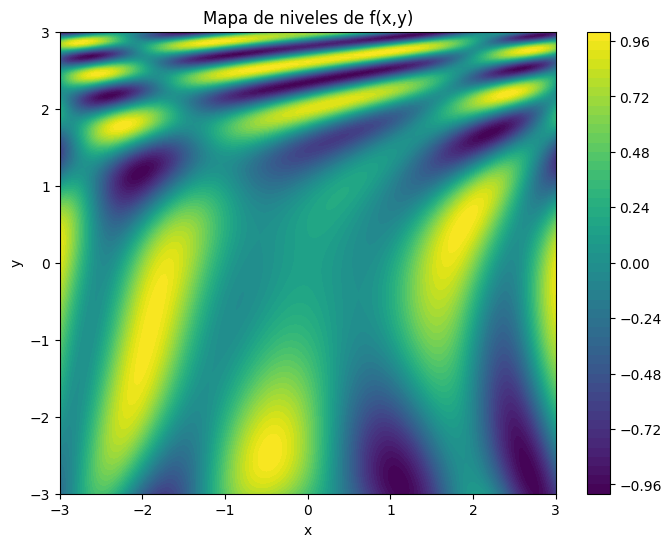

In [ ]:

# Dominio
res = 200
rango = 3

X = np.linspace(-rango, rango, res)
Y = np.linspace(-rango, rango, res)
Z = np.zeros((res, res))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[j, i] = f([x, y])

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 50)
plt.colorbar()
plt.title("Mapa de niveles de f(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


BÚSQUEDA GLOBAL – RANDOM SEARCH

Esto evita caer en mínimos locales malos

In [ ]:
def random_search(f, bounds, n_iter=5000):
    best_x = None
    best_val = float("inf")

    for _ in range(n_iter):
        x = [random.uniform(bounds[0][0], bounds[0][1]),
             random.uniform(bounds[1][0], bounds[1][1])]
        val = f(x)

        if val < best_val:
            best_val = val
            best_x = x

    return best_x, best_val


In [ ]:
bounds = [(-3, 3), (-3, 3)]
x0, f0 = random_search(f, bounds)

print("Mejor punto tras búsqueda global:")
print("x =", x0)
print("f(x) =", f0)


Mejor punto tras búsqueda global:
x = [2.671671087395291, -2.7066783471140874]
f(x) = -0.9996658019330779


OPTIMIZACIÓN LOCAL- DESCENSO POR GRADIENTE NUMÉRICO

Como la derivada analítica es fea, usamos gradiente numérico.

In [ ]:
def gradiente_numerico(f, X, h=1e-5):
    grad = []
    for i in range(len(X)):
        X1 = X.copy()
        X2 = X.copy()
        X1[i] += h
        X2[i] -= h
        grad.append((f(X1) - f(X2)) / (2*h))
    return grad


In [ ]:
def descenso_gradiente(f, X0, lr=0.05, n_iter=100):
    X = X0.copy()
    trayectoria = [X.copy()]

    for _ in range(n_iter):
        grad = gradiente_numerico(f, X)
        X[0] -= lr * grad[0]
        X[1] -= lr * grad[1]
        trayectoria.append(X.copy())

    return X, trayectoria


In [ ]:
X_opt, path = descenso_gradiente(f, x0)

print("\nResultado final tras optimización:")
print("x =", X_opt)
print("f(x) =", f(X_opt))



Resultado final tras optimización:
x = [2.673973850623448, -2.7293696248744768]
f(x) = -0.9999998265451585


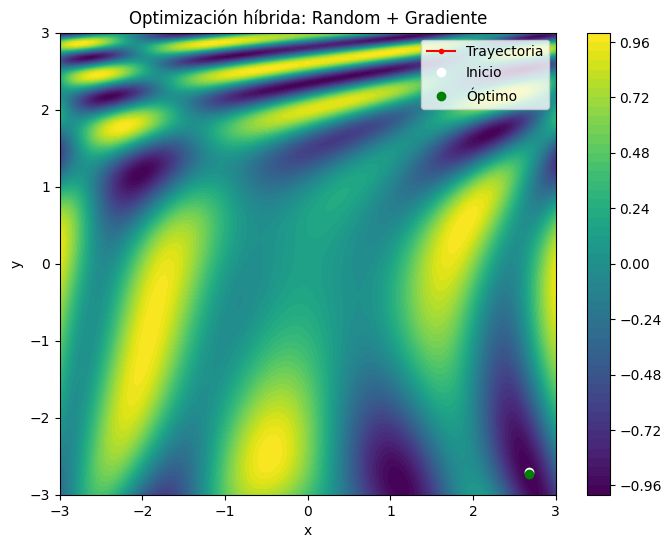

In [ ]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 50)
plt.colorbar()

path = np.array(path)
plt.plot(path[:,0], path[:,1], 'r.-', label="Trayectoria")
plt.plot(path[0,0], path[0,1], 'wo', label="Inicio")
plt.plot(path[-1,0], path[-1,1], 'go', label="Óptimo")

plt.legend()
plt.title("Optimización híbrida: Random + Gradiente")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


¿Qué significa?
Cada color = valor de la función
Zonas oscuras → valores bajos
Zonas claras → valores altos

Interpretación mental:
Mapa topográfico
El algoritmo “baja” por el relieve hasta un valle

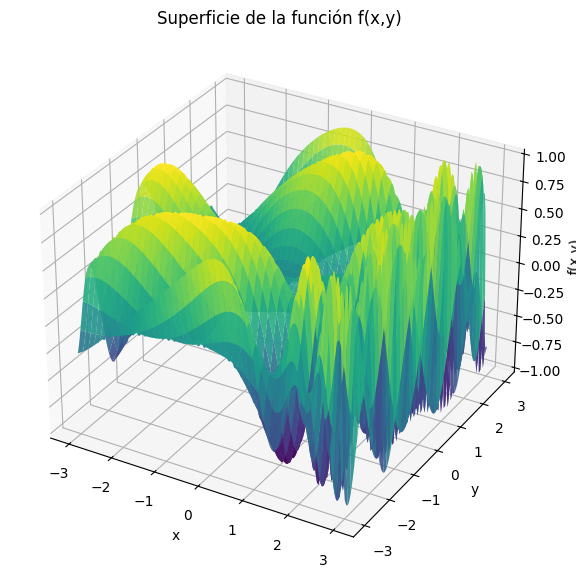

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X.reshape(-1,1),
                Y.reshape(1,-1),
                Z, cmap='viridis', alpha=0.9)

ax.set_title("Superficie de la función f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()


La función presenta un paisaje altamente no convexo y oscilatorio, con múltiples extremos locales. Su visualización mediante mapas de niveles y superficies 3D muestra la presencia de numerosos valles y crestas, lo que justifica el uso de métodos de optimización global combinados con técnicas locales de refinamiento.

Resultado:
* Una superficie ondulada
* Picos y valles por todas partes
* Nada parecido a un paraboloide simple

Esto justifica totalmente:
* random search
* búsqueda global
* métodos híbridos

¿Por qué no solo gradiente?
* Función no convexa
* Muchos óptimos locales
* Dependencia fuerte del punto inicial

¿Por qué esta estrategia es correcta?
* Random Search → explora globalmente
* Gradiente → converge rápido localmente
* Reduce probabilidad de mal óptimo